In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../../results/results_07-07.csv")
df_properties = pd.read_csv("../../metadata/datasets_properties.csv")

In [4]:
remove_datasets = [
    "DuckDuckGeese",
    "InsectWingbeat",
    "PEMS-SF",
]

df["convolution_algorithm"] = df["convolution_algorithm"].fillna("Sem Convolução")
df["representation"] = df["representation"].fillna("Sem Representação")
df["operation"] = df["operation"].fillna("Sem Operação de Fusão")

df = df[~(df["dataset"].isin(remove_datasets))]

df = pd.merge(df, df_properties, on='dataset', how='inner')

df["operation"] = df["operation"].replace("sum", "Soma")
df["operation"] = df["operation"].replace("subtraction", "Subtração")
df["operation"] = df["operation"].replace("dot_product", "Produto Matricial")
df["operation"] = df["operation"].replace("element_wise", "Produto de Hadamard")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dataset                   1970 non-null   object 
 1   representation            1970 non-null   object 
 2   operation                 1970 non-null   object 
 3   accuracy                  1970 non-null   float64
 4   convolution_algorithm     1970 non-null   object 
 5   classification_algorithm  1970 non-null   object 
 6   train_cases               1970 non-null   int64  
 7   test_cases                1970 non-null   int64  
 8   dimensions                1970 non-null   int64  
 9   length                    1970 non-null   int64  
 10  classes                   1970 non-null   int64  
 11  category                  1970 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 184.8+ KB


In [6]:
df_properties

,dataset,train_cases,test_cases,dimensions,length,classes,category
0,ArticularyWordRecognition,275,300,9,144,25,Motion Classification
1,AtrialFibrillation,15,15,2,640,3,ECG Classification
2,BasicMotions,40,40,6,100,4,Human Activity Recognition
3,CharacterTrajectories,1422,1436,3,182,20,Motion Classification
4,Cricket,108,72,6,1197,12,Human Activity Recognition
5,DuckDuckGeese,60,40,1345,270,5,Audio Spectra Classification
6,EigenWorms,128,131,6,17984,5,Motion Classification
7,Epilepsy,137,138,3,206,4,Human Activity Recognition
8,EthanolConcentration,261,263,3,1751,4,Other Problems
9,ERing,30,30,4,65,6,Human Activity Recognition


## Por dataset

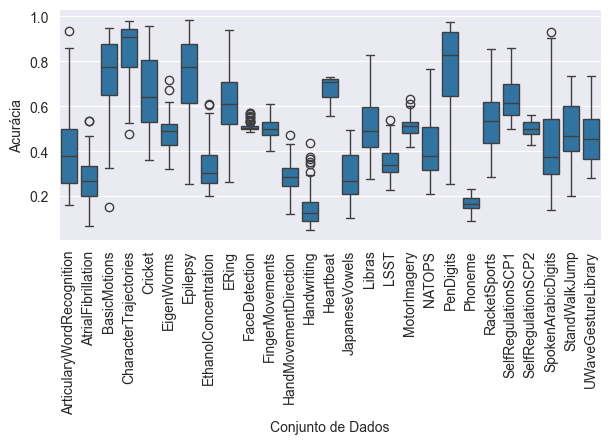

In [7]:
plt.figure(figsize=(7, 3))
plt.xticks(rotation=90)

plt.xlabel("Conjunto de Dados")
plt.ylabel("Acurácia")

sns.boxplot(x="dataset", y="accuracy", data=df)

plt.show()

# Por representação

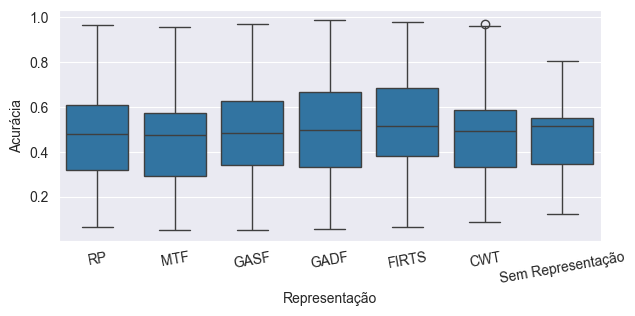

In [8]:
plt.figure(figsize=(7, 3))
plt.xticks(rotation=10)

plt.xlabel("Representação")
plt.ylabel("Acurácia")

sns.boxplot(x="representation", y="accuracy", data=df)

plt.show()

# Por operação de fusão

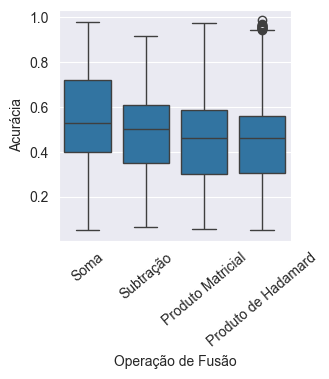

In [9]:
plt.figure(figsize=(3, 3))
plt.xticks(rotation=40)

plt.xlabel("Operação de Fusão")
plt.ylabel("Acurácia")

sns.boxplot(x="operation", y="accuracy", data=df[df["operation"] != "Sem Operação de Fusão"])

plt.show()

# Por algoritmo de convolução

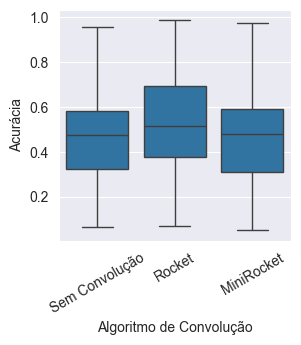

In [10]:
plt.figure(figsize=(3, 3))
plt.xticks(rotation=30)

plt.xlabel("Algoritmo de Convolução")
plt.ylabel("Acurácia")

sns.boxplot(x="convolution_algorithm", y="accuracy", data=df)

plt.show()

# Por representação e operação

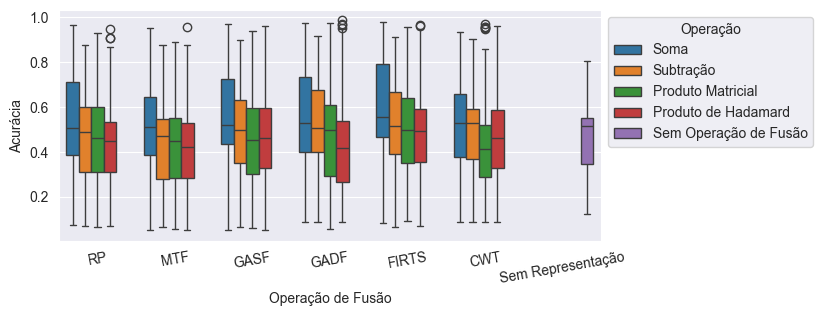

In [11]:
plt.figure(figsize=(7, 3))
plt.xticks(rotation=10)

plt.xlabel("Operação de Fusão")
plt.ylabel("Acurácia")

sns.boxplot(x="representation", y="accuracy", hue="operation", data=df)

plt.legend(title='Operação', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# Por representação e algoritmo de convolução

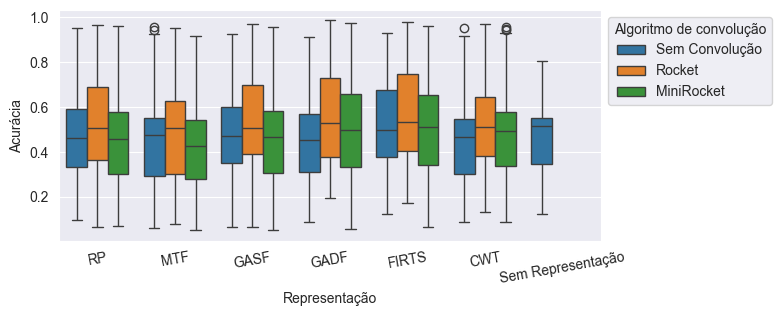

In [12]:
plt.figure(figsize=(7, 3))
plt.xticks(rotation=10)

plt.xlabel("Representação")
plt.ylabel("Acurácia")

sns.boxplot(x="representation", y="accuracy", hue="convolution_algorithm", data=df)

plt.legend(title='Algoritmo de convolução', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# Por operação e algoritmo de convolução

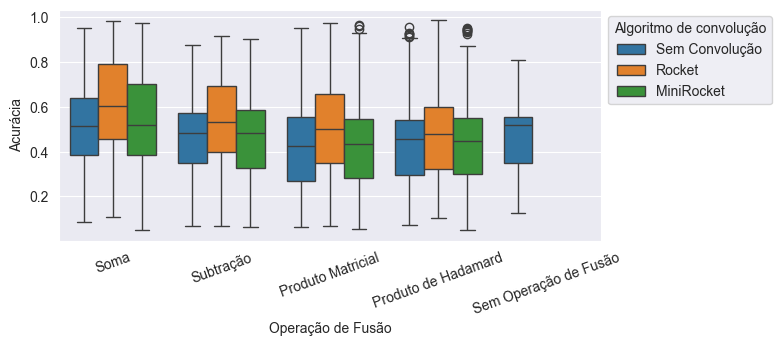

In [13]:
plt.figure(figsize=(7, 3))
plt.xticks(rotation=20)

plt.xlabel("Operação de Fusão")
plt.ylabel("Acurácia")

sns.boxplot(x="operation", y="accuracy", hue="convolution_algorithm", data=df)

plt.legend(title='Algoritmo de convolução', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# Por dimensões

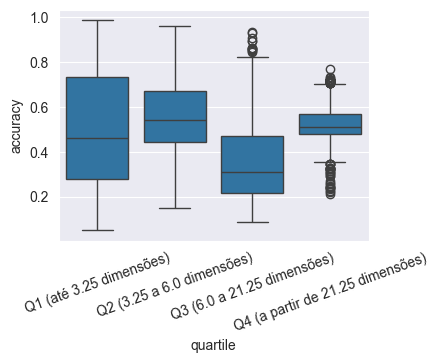

In [14]:
dimensions = df_properties["dimensions"]

q1 = np.percentile(dimensions, 25)
q2 = np.percentile(dimensions, 50)
q3 = np.percentile(dimensions, 75)

df.loc[df['dimensions'] <= q1, 'quartile'] = 1
df.loc[(df['dimensions'] > q1) & (df["dimensions"] <= q2), 'quartile'] = 2
df.loc[(df['dimensions'] > q2) & (df["dimensions"] <= q3), 'quartile'] = 3
df.loc[df['dimensions'] > q3, 'quartile'] = 4


plt.figure(figsize=(4, 3))
plt.xticks(np.arange(4), [
    f'Q1 (até {q1} dimensões)', 
    f'Q2 ({q1} a {q2} dimensões)', 
    f'Q3 ({q2} a {q3} dimensões)', 
    f'Q4 (a partir de {q3} dimensões)',
])
plt.xticks(rotation=20)

sns.boxplot(x="quartile", y="accuracy", data=df)

plt.show()

# colocar qual o intervalo de cada quartil
# pegar a configuração rocket, sum com o First e usar como comparador

## Por casos de treinamento

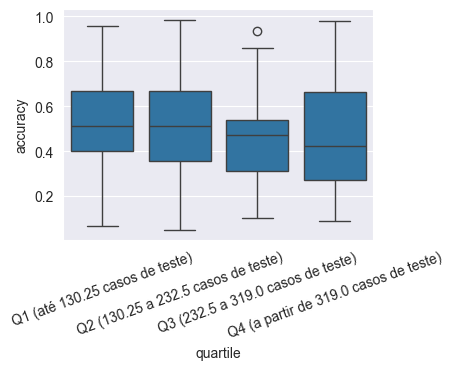

In [15]:
train_cases = df_properties["train_cases"]

q1 = np.percentile(train_cases, 25)
q2 = np.percentile(train_cases, 50)
q3 = np.percentile(train_cases, 75)

df.loc[df['train_cases'] <= q1, 'quartile'] = 1
df.loc[(df['train_cases'] > q1) & (df["train_cases"] <= q2), 'quartile'] = 2
df.loc[(df['train_cases'] > q2) & (df["train_cases"] <= q3), 'quartile'] = 3
df.loc[df['train_cases'] > q3, 'quartile'] = 4


plt.figure(figsize=(4, 3))
plt.xticks(np.arange(4), [
    f'Q1 (até {q1} casos de teste)', 
    f'Q2 ({q1} a {q2} casos de teste)', 
    f'Q3 ({q2} a {q3} casos de teste)', 
    f'Q4 (a partir de {q3} casos de teste)',
])
plt.xticks(rotation=20)

sns.boxplot(x="quartile", y="accuracy", data=df)

plt.show()


## Por quantidade de classes

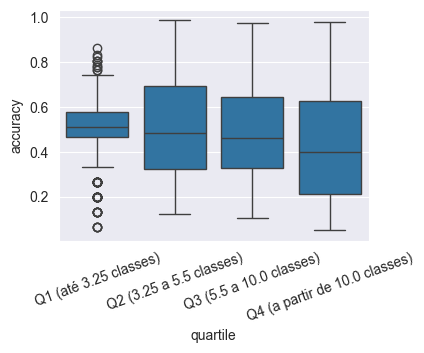

In [16]:
classes = df_properties["classes"]

q1 = np.percentile(classes, 25)
q2 = np.percentile(classes, 50)
q3 = np.percentile(classes, 75)

df.loc[df['classes'] <= q1, 'quartile'] = 1
df.loc[(df['classes'] > q1) & (df["classes"] <= q2), 'quartile'] = 2
df.loc[(df['classes'] > q2) & (df["classes"] <= q3), 'quartile'] = 3
df.loc[df['classes'] > q3, 'quartile'] = 4


plt.figure(figsize=(4, 3))
plt.xticks(np.arange(4), [
    f'Q1 (até {q1} classes)', 
    f'Q2 ({q1} a {q2} classes)', 
    f'Q3 ({q2} a {q3} classes)', 
    f'Q4 (a partir de {q3} classes)',
])
plt.xticks(rotation=20)

sns.boxplot(x="quartile", y="accuracy", data=df)

plt.show()


## Por comprimento das séries

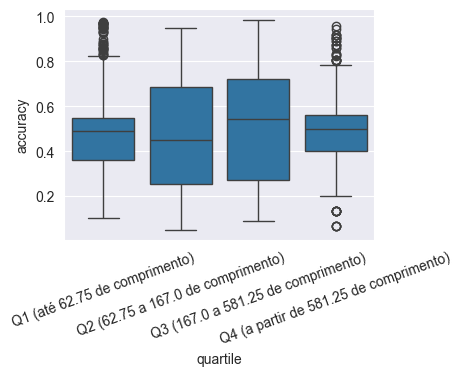

In [17]:
length = df_properties["length"]

q1 = np.percentile(length, 25)
q2 = np.percentile(length, 50)
q3 = np.percentile(length, 75)

df.loc[df['length'] <= q1, 'quartile'] = 1
df.loc[(df['length'] > q1) & (df["length"] <= q2), 'quartile'] = 2
df.loc[(df['length'] > q2) & (df["length"] <= q3), 'quartile'] = 3
df.loc[df['length'] > q3, 'quartile'] = 4


plt.figure(figsize=(4, 3))
plt.xticks(np.arange(4), [
    f'Q1 (até {q1} de comprimento)', 
    f'Q2 ({q1} a {q2} de comprimento)', 
    f'Q3 ({q2} a {q3} de comprimento)', 
    f'Q4 (a partir de {q3} de comprimento)',
])
plt.xticks(rotation=20)

sns.boxplot(x="quartile", y="accuracy", data=df)

plt.show()

## Por categoria de dataset

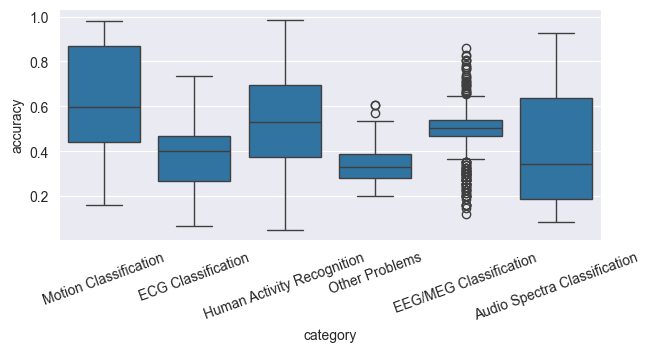

In [18]:
plt.figure(figsize=(7, 3))
plt.xticks(rotation=20)

sns.boxplot(x="category", y="accuracy", data=df)

plt.show()